In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from tqdm.notebook import tqdm

Импортируем наши данные и тестовый датафрейм

In [2]:
df = pd.read_csv('course_project_train.csv')
df_test = pd.read_csv('course_project_test.csv')

## Обработка данных

In [3]:
df

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,402192.0,< 1 year,0.0,3.0,8.5,107866.0,0.0,NaN,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0
7496,Home Mortgage,1533984.0,1 year,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0,1
7497,Rent,1878910.0,6 years,0.0,12.0,32.1,1778920.0,0.0,NaN,0.0,buy a car,Short Term,99999999.0,477812.0,12479.0,748.0,0
7498,Home Mortgage,NaN,NaN,0.0,21.0,26.5,1141250.0,0.0,NaN,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,NaN,0


У нас 16 признаков, и 2 класса. Нам нужноо предсказать для тестового dataset-a Credit Deefault. Посмотрим есть ли отсутвтующие данные.

In [4]:
df.isnull().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

Есть. отложим пока их. Проанализируем признаки на их категориальность.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,5943.0,1.366392e+06,8.453392e+05,164597.0,844341.0,1168386.0,1640137.00,1.014934e+07
Tax Liens,7500.0,3.013333e-02,2.716035e-01,0.0,0.0,0.0,0.00,7.000000e+00
Number of Open Accounts,7500.0,1.113093e+01,4.908924e+00,2.0,8.0,10.0,14.00,4.300000e+01
Years of Credit History,7500.0,1.831747e+01,7.041946e+00,4.0,13.5,17.0,21.80,5.770000e+01
Maximum Open Credit,7500.0,9.451537e+05,1.602622e+07,0.0,279229.5,478159.0,793501.50,1.304726e+09
Number of Credit Problems,7500.0,1.700000e-01,4.985978e-01,0.0,0.0,0.0,0.00,7.000000e+00
Months since last delinquent,3419.0,3.469260e+01,2.168881e+01,0.0,16.0,32.0,50.00,1.180000e+02
Bankruptcies,7486.0,1.171520e-01,3.471917e-01,0.0,0.0,0.0,0.00,4.000000e+00
Current Loan Amount,7500.0,1.187318e+07,3.192612e+07,11242.0,180169.0,309573.0,519882.00,1.000000e+08
Current Credit Balance,7500.0,2.898332e+05,3.178714e+05,0.0,114256.5,209323.0,360406.25,6.506797e+06


In [6]:
df.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

В датасете есть 4 категориальных признака. Так же посмотрим как выглядият вещественные признаки в зависимости от класса.

In [7]:
df[df['Credit Default'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,1584.0,1.224243e+06,707773.280131,194028.0,772673.0,1055915.5,1493894.0,8710740.0
Tax Liens,2113.0,4.070043e-02,0.306572,0.0,0.0,0.0,0.0,5.0
Number of Open Accounts,2113.0,1.135731e+01,4.996364,2.0,8.0,11.0,14.0,42.0
Years of Credit History,2113.0,1.808623e+01,7.244804,4.5,13.1,16.7,21.5,57.7
Maximum Open Credit,2113.0,5.798982e+05,551754.132879,0.0,256256.0,442090.0,727958.0,6639358.0
Number of Credit Problems,2113.0,1.859915e-01,0.542644,0.0,0.0,0.0,0.0,5.0
Months since last delinquent,983.0,3.478128e+01,22.121493,0.0,15.0,33.0,52.0,86.0
Bankruptcies,2109.0,1.180654e-01,0.354961,0.0,0.0,0.0,0.0,4.0
Current Loan Amount,2113.0,3.266510e+05,186027.080635,21472.0,181610.0,290576.0,444708.0,788634.0
Current Credit Balance,2113.0,2.799256e+05,265943.152770,0.0,112461.0,210102.0,353647.0,3944514.0


In [8]:
df[df['Credit Default'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,4359.0,1.418047e+06,8.845096e+05,164597.0,866352.5,1225747.0,1709572.5,1.014934e+07
Tax Liens,5387.0,2.598849e-02,2.565016e-01,0.0,0.0,0.0,0.0,7.000000e+00
Number of Open Accounts,5387.0,1.104214e+01,4.871796e+00,2.0,8.0,10.0,14.0,4.300000e+01
Years of Credit History,5387.0,1.840817e+01,6.959349e+00,4.0,13.7,17.1,22.0,5.190000e+01
Maximum Open Credit,5387.0,1.088422e+06,1.890526e+07,0.0,289586.0,493746.0,823361.0,1.304726e+09
Number of Credit Problems,5387.0,1.637275e-01,4.801272e-01,0.0,0.0,0.0,0.0,7.000000e+00
Months since last delinquent,2436.0,3.465681e+01,2.151623e+01,0.0,17.0,32.0,50.0,1.180000e+02
Bankruptcies,5377.0,1.167938e-01,3.441295e-01,0.0,0.0,0.0,0.0,4.000000e+00
Current Loan Amount,5387.0,1.640219e+07,3.669223e+07,11242.0,179806.0,314534.0,551078.0,1.000000e+08
Current Credit Balance,5387.0,2.937194e+05,3.359989e+05,0.0,114503.5,209285.0,362909.5,6.506797e+06


В данных имеется перекос в сторону не целевого класса.

# Категориальные признаки
## Years in current job

In [9]:
df['Years in current job'].value_counts(normalize=True)

10+ years    0.327115
2 years      0.098892
3 years      0.086969
< 1 year     0.078973
5 years      0.072380
1 year       0.070697
4 years      0.065788
6 years      0.059756
7 years      0.055548
8 years      0.047552
9 years      0.036330
Name: Years in current job, dtype: float64

In [10]:
df['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

Заменим категории на года в целочисленном виде.

In [11]:
df['Years in current job'].replace(to_replace=r'\D', value='',regex=True,inplace=True)
df_test['Years in current job'].replace(to_replace=r'\D', value='',regex=True,inplace=True)

In [12]:
df['Years in current job'].value_counts()

10    2332
1     1067
2      705
3      620
5      516
4      469
6      426
7      396
8      339
9      259
Name: Years in current job, dtype: int64

In [13]:
df['Years in current job'].median()

6.0

Заменим отсутствующие значения на медиану, и изменим тип на int64.

In [14]:
df['Years in current job'].fillna(6, inplace=True)
df_test['Years in current job'].fillna(6, inplace=True)

## Home Ownership

In [15]:
df['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

Воспользуемся LabelEncoder для замены категориальных признаков на целые.

In [16]:
from sklearn.preprocessing import LabelEncoder
le_owner = LabelEncoder()
le_owner.fit(df['Home Ownership'])
df['Home Ownership'] = le_owner.transform(df['Home Ownership'])
df_test['Home Ownership'] = le_owner.transform(df_test['Home Ownership'])
df['Home Ownership'].value_counts()

1    3637
3    3204
2     647
0      12
Name: Home Ownership, dtype: int64

## Purpose
Purpose у нас полные данные.

In [17]:
df['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

Повторяем туже операцию.

In [18]:
le_purpose = LabelEncoder()
le_purpose.fit(df['Purpose'])
df['Purpose'] = le_purpose.transform(df['Purpose'])
df_test['Purpose'] = le_purpose.transform(df_test['Purpose'])
df['Purpose'].value_counts()

3     5944
9      665
5      412
0      129
1       96
7       71
6       40
12      37
2       34
11      26
14      15
8       11
4       10
13       8
10       2
Name: Purpose, dtype: int64

In [19]:
df['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

In [20]:
le_term = LabelEncoder()
le_term.fit(df['Term'])
df['Term'] = le_term.transform(df['Term'])
df_test['Term'] = le_term.transform(df_test['Term'])

## Term
тут все ок

In [21]:
df['Term'].value_counts() 

1    5556
0    1944
Name: Term, dtype: int64

Переведем все категориальные признаки в тип int32.

In [22]:
features_to_int = ['Home Ownership', 'Years in current job', 'Purpose', 'Term']
for feature in features_to_int:
    df[feature] = df[feature].astype(dtype='int32')
    df_test[feature] = df_test[feature].astype(dtype='int32')

# Вечественные признаки
## Annual Income

<AxesSubplot:>

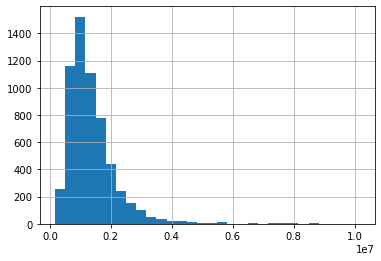

In [23]:
df['Annual Income'].hist(bins=30)

По гистограмме вроде все в порядке, заменим пропуски на медиану.

In [24]:
median = df['Annual Income'].median()
df['Annual Income'].fillna(median, inplace=True)
df_test['Annual Income'].fillna(median, inplace=True)

## Months since last delinquent

<AxesSubplot:>

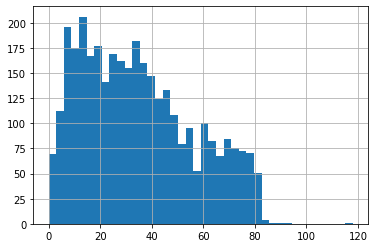

In [25]:
df['Months since last delinquent'].hist(bins=40)

По гистограмме вроде все в порядке, без выбросов, заменим пропуски на медиану.

In [26]:
median = df['Months since last delinquent'].median()
df['Months since last delinquent'].fillna(median, inplace=True)
df_test['Months since last delinquent'].fillna(median, inplace=True)

## Bankruptcies

In [27]:
median = df['Bankruptcies'].median()
df['Bankruptcies'].fillna(median, inplace=True)
df_test['Bankruptcies'].fillna(median, inplace=True)
df['Bankruptcies'].value_counts()

0.0    6674
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

## Credit Score

<AxesSubplot:>

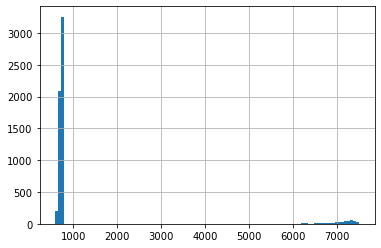

In [28]:
df['Credit Score'].hist(bins=100)

In [29]:
df[df['Credit Score'] < 1000]['Credit Default'].value_counts()

0    4359
1    1184
Name: Credit Default, dtype: int64

In [30]:
df[df['Credit Score'] > 800]['Credit Default'].value_counts()

1    400
Name: Credit Default, dtype: int64

Есть выбросы, но как мы видим по распределениям класов, они крайне полезны, так ка квсегда дают класс 1. Воспользуемся KNNImputer для вставки отсутствующих значений. Так как линейные апроксимации могут дать неадекватные значения. Для этого уберем из df столбец с классом чтобы он не учитывался.

In [31]:
y = df.pop('Credit Default')

"Обучаем" импутер на данных из df и применяем его к даннмы в df и df_test. на данный момент не особо понимаю как выбрать n_neibours, из головы выбрал 7.

In [32]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7, weights="uniform")
imputer.fit(df)
X = pd.DataFrame(imputer.transform(df))
X.columns = df.columns
X_test = pd.DataFrame(imputer.transform(df_test))
X_test.columns = df_test.columns

In [33]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Home Ownership,7500.0,1.939067e+00,9.565262e-01,0.0,1.000000,2.0,3.00,3.000000e+00
Annual Income,7500.0,1.325286e+06,7.567551e+05,164597.0,931133.000000,1168386.0,1499974.00,1.014934e+07
Years in current job,7500.0,5.961333e+00,3.412183e+00,1.0,3.000000,6.0,10.00,1.000000e+01
Tax Liens,7500.0,3.013333e-02,2.716035e-01,0.0,0.000000,0.0,0.00,7.000000e+00
Number of Open Accounts,7500.0,1.113093e+01,4.908924e+00,2.0,8.000000,10.0,14.00,4.300000e+01
Years of Credit History,7500.0,1.831747e+01,7.041946e+00,4.0,13.500000,17.0,21.80,5.770000e+01
Maximum Open Credit,7500.0,9.451537e+05,1.602622e+07,0.0,279229.500000,478159.0,793501.50,1.304726e+09
Number of Credit Problems,7500.0,1.700000e-01,4.985978e-01,0.0,0.000000,0.0,0.00,7.000000e+00
Months since last delinquent,7500.0,3.322747e+01,1.470395e+01,0.0,32.000000,32.0,32.00,1.180000e+02
Bankruptcies,7500.0,1.169333e-01,3.469044e-01,0.0,0.000000,0.0,0.00,4.000000e+00


In [34]:
X.isna().sum()

Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
dtype: int64

В остальных данных вроде аномалий особых нету, пропуски тоже отсутствуют.

# Модель
Выбрал Random Forest, просто как первый вариант, но потом на номральный анализ в других моделях просто не хватило времени. Так же написал функцию для кросс валидации леса c разным threshold. CV количество лесов на разных выборках, test_size размер используемой тесовой выборки, threshold - порог по которому выдается класс 1. Возвращает средние f1, precision, recall по всем выборкам.

In [37]:
def CV_RF(rf, X, y, threshold=0.5, CV=10, test_size=0.2):
    f1, recall, precision = [], [], []
    for i in range(CV):
        X_train, X_test, y_train, y_test = tts(X, y, test_size=test_size)
        rf.fit(X_train, y_train)
        y_pred_proba = rf.predict_proba(X_test)
        y_pred = np.where(y_pred_proba > threshold, 1, 0)
        f1.append(metrics.f1_score(y_test, y_pred[:,1]))
        precision.append(metrics.precision_score(y_test, y_pred[:,1]))
        recall.append(metrics.recall_score(y_test, y_pred[:,1]))
        my_metrics = list([np.mean(f1), np.mean(recall), np.mean(precision)])
    return my_metrics

По первым исследованиям показало что лучший вариант threshold гдето рядом с 0.35 атм и будем искать.

In [40]:
%%time
thresholds = np.linspace(0.25, 0.5, 25)
my_metrics_list = []
rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=1, n_jobs=-1)
for threshold in tqdm(thresholds):
    my_metrics_list.append(CV_RF(rf, X, y ,threshold=threshold, CV=10, test_size=0.15))



Wall time: 18min 19s


In [41]:
my_metrics = np.array(my_metrics_list).T

Построим график зависимости наших метрик от threshold.

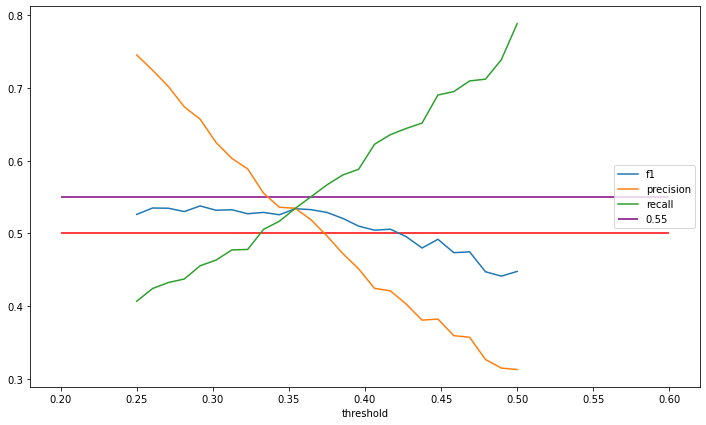

In [43]:
plt.figure(figsize=(12,7))
plt.plot(thresholds, my_metrics[0], label='f1')
plt.plot(thresholds, my_metrics[1],label='precision')
plt.plot(thresholds, my_metrics[2], label='recall')
plt.hlines(0.5, 0.2, 0.6, colors='red')
plt.hlines(0.55, 0.2, 0.6, colors='purple', label='0.55')
plt.xlabel("threshold")
plt.legend(loc='right')

Функция нахидот threshold при котором у нас наименьшее рассояние между между метриками, возвращает threshold и индекс.

In [44]:
def threshold_finder(metrics, thresholds):
    error = np.inf 
    for i in range(len(thresholds)):
        error_tmp = (metrics[0][i] - metrics[1][i])**2 + (metrics[0][i] - metrics[2][i])**2
        if error_tmp < error:
            error = error_tmp
            index = i
            threshold = thresholds[i]
    return threshold, index

Посчитаем "лучший" threshold.

In [45]:
threshold = threshold_finder(my_metrics, thresholds)
threshold

(0.35416666666666663, 10)

Посмотрим какие метрики получаются при таком threshold, ка кпоказала практика, от первоначальных выборок зависит очень много, и эти результаты не дают хорошего понимания кким будет итоговый результат. Но он должен уверенно удволетворять условиям нашей задачи (все три метрики больше 0.5).

In [46]:
rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=1, n_jobs=-1)
my_metrics = CV_RF(rf, X, y ,threshold=0.354, CV=20, test_size=0.1)
print(my_metrics)

[0.5216271961763674, 0.526064365054982, 0.5186422244316207]


посмотрим сколько признаков дает хороший результат.

In [47]:
max_features = [1,2,3,4,5,6,7,8,9,10]
new_metrics = []
for i in tqdm(max_features):
    rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=1, n_jobs=-1, max_features=i)
    my_metrics = CV_RF(rf, X, y ,threshold=0.354, CV=50, test_size=0.2)
    new_metrics.append(my_metrics)

In [48]:
new_metrics

[[0.5148299020357614, 0.4891399667844955, 0.544730593715969],
 [0.5226870053927153, 0.5082200537791239, 0.539041107403107],
 [0.5248913370123703, 0.5166128851116429, 0.5343720644859089],
 [0.5248304849027445, 0.522320036355874, 0.528318906284602],
 [0.5255249584165932, 0.5272624747806701, 0.5247193552094068],
 [0.5203503602732442, 0.5293463033765428, 0.5126813809641868],
 [0.5256714948962697, 0.5322901715213963, 0.5200807061484938],
 [0.5264145270523402, 0.5407251565432936, 0.5138658923153888],
 [0.5259854051497572, 0.539564426707493, 0.5135644470978722],
 [0.5248407736562707, 0.5393532563521909, 0.5117686313668157]]

по этим результатам и еще примерно 3м, получилось что лучше всего примерно 3 фитчи. попробуем посмотреть на ограничение в листе дает ли оно что-то(вроде недолжно, мы просто можем взять много деервьев и переобученности не будет).

In [51]:
min_samples_leafs = [1,2,3,4,5,6,7,8,9,10]
new_metrics = []
for i in tqdm(min_samples_leafs):
    rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=i, n_jobs=-1, max_features=3)
    my_metrics = CV_RF(rf, X, y ,threshold=0.354, CV=20, test_size=0.2)
    new_metrics.append(my_metrics)

In [52]:
new_metrics

[[0.5289626807090435, 0.5203581477707537, 0.5384786229534708],
 [0.525374086217157, 0.5028254049885847, 0.5515756381819782],
 [0.5264519809293324, 0.5028262853325237, 0.5532860123238641],
 [0.529821040729094, 0.5032892555640681, 0.5610946453522818],
 [0.5263741431137339, 0.48799846064671026, 0.5725830444592138],
 [0.5258309647846185, 0.48814005095214463, 0.5710600607587347],
 [0.531940863739051, 0.4948774736185002, 0.576453419682328],
 [0.5232926453505027, 0.483992784698275, 0.5707926832344208],
 [0.523476035834342, 0.4851519071200938, 0.5692497809282562],
 [0.517301118076287, 0.4679220005619005, 0.5790070811166063]]

Похоже разница не большая, видно что данные начинают разьезжаться при увеличении min_samples_leaf, оставим 1.

В итоге получаем max_features=3, min_samples_leaf=1, threshold=0.345. Мы делали последовательное исследовнание на парамеры, а не перекрестное, что должно ухудшить результаты. Но при таком разбросе f1  посчиатнного на 20+ разных выборках. Чтобы устроить нормальный грид серч мы потратим нереально много ресурсов, которых у нас нету. Теперь обучим нашу модель на всем датасете, и посчитаем ответы для тестового датасета.

df_test у нас уже подготовлен. обучим на наших параметрах взяв побольше деревьев (переобучится то мы не можем).

In [59]:
rf = RandomForestClassifier(n_estimators=2000, max_features=3, min_samples_leaf=1, n_jobs=-1)
rf.fit(X,y)
y_test_pred_proba = rf.predict_proba(X_test)
y_test_pred = np.where(y_pred_proba > 0.345, 1, 0)
y_test_pred = y_test_pred[:,1]

In [60]:
y_test_pred

array([0, 1, 1, ..., 1, 0, 1])

In [62]:
pd.DataFrame(y_test_pred).to_csv('ZaycevAD_predictions.csv', header=None, index=None)